In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("titanic.csv")

In [15]:
import re

#Extract the title from "Name" Column
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)

#Replace rare titles with "Rare" and map other titles to a more concise representation
df["Title"]=df["Title"].replace(["Lady","Capt","Don","Dr","Major","Rev","Sir","Dona"],"Rare")
df["Title"]=df["Title"].replace(["Mlle","Ms"],"Miss")
df["Title"]=df["Title"].replace(["Mme"],"Mrs")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
#Create a new column "AgeGroup" based on age ranges
age_bins=[0,16,32,48,64,80]
age_labels=["Child","Young Adult","Adult","Middle-Age","Senior"]
df["AgeGroup"]=pd.cut(df["Age"],bins=age_bins,labels=age_labels)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [17]:
#Create a new column "FareCategory" based on fare ranges
fare_bins=[0,7.91,14.454,31,float("inf")]
fare_labels=["Low","Medium","High","Very High"]
df["FareCategory"]=pd.cut(df["Fare"],bins=fare_bins,labels=fare_labels)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Young Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult,Medium
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,NaN,Medium
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Middle-Age,Very High
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Child,High
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Young Adult,Medium
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Child,High


In [18]:
#Drop unnecessary columns
titanic_data=df.drop(["PassengerId","Ticket","Cabin"],axis=1)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup,FareCategory
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Young Adult,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Adult,Very High
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Young Adult,Medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Adult,Very High
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Adult,Medium


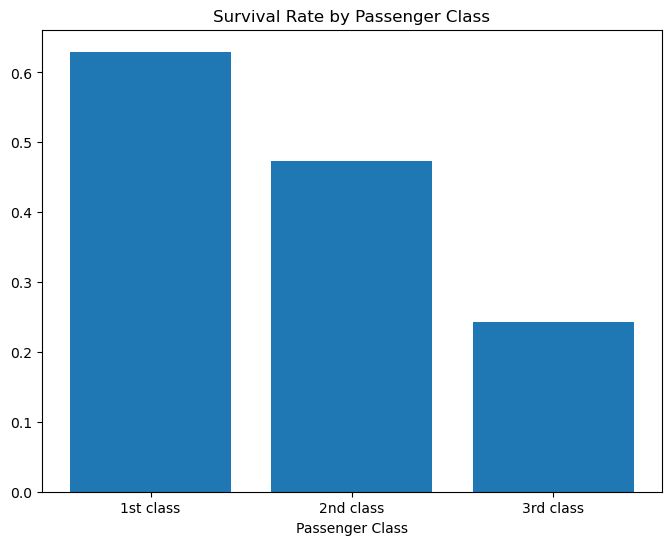

In [19]:
#Calculate the survival rate by passenger class
survival_rate_by_class=titanic_data.groupby("Pclass")["Survived"].mean().reset_index()

#Create a bar blot
plt.figure(figsize=(8,6))
plt.bar(survival_rate_by_class["Pclass"],survival_rate_by_class["Survived"])
plt.xlabel("Passenger Class")
plt.ylabel=("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.xticks(survival_rate_by_class["Pclass"],['1st class',"2nd class","3rd class"])
plt.show()

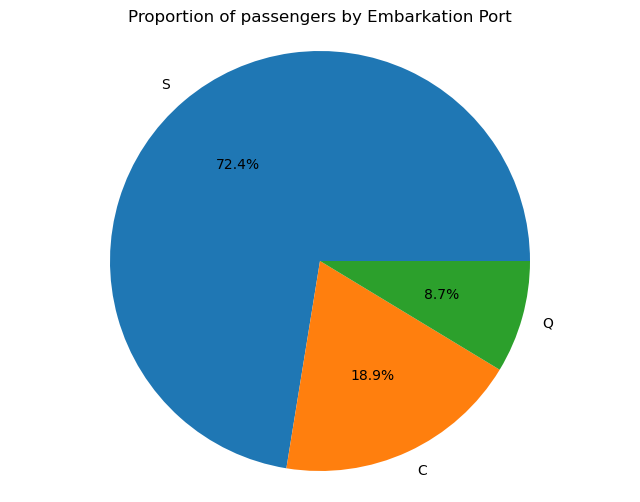

In [20]:
#Count the number of passenger by embarkation port
embarkation_counts=titanic_data["Embarked"].value_counts()

#Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(embarkation_counts,labels=embarkation_counts.index,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Proportion of passengers by Embarkation Port")
plt.show()

In [23]:
#Drop the unnecessary columns
columns_to_keep=["Survived","Pclass","SibSp","Parch","Fare"]
titanic_data=titanic_data[columns_to_keep]
titanic_data.head()

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


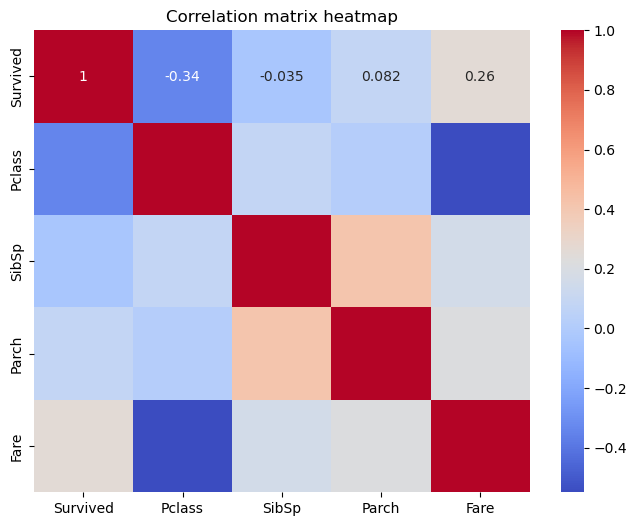

In [24]:
import seaborn as sns
#Create a correlation matrix
cor_matrix=titanic_data.corr()

#Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation matrix heatmap")
plt.show()